In [4]:
from math import sin, cos, log
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size']=16

g = 9.8
v_t = 4.9
C_D = 1/5.0
C_L = 1

v0 = 6.5
theta0= -0.1
x0 = 0.0
y0 = 2.0

In [43]:
def f(u):
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta)-C_D/C_L*g/v_t**2.0*v**2.0,\
                   -g*cos(theta)/v+g/v_t**2.0*v,\
                   v*cos(theta),\
                   v*sin(theta)])

def euler_step(u,f,dt):
    return u+dt*f(u)
def get_diffgrid(u_current, u_fine, dt):
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
    grid_size_ratio = numpy.ceil(N_fine/N_current)
    diffgrid = dt*numpy.sum(numpy.abs(u_current[:,2]\
                            -u_fine[::grid_size_ratio,2]))
    return diffgrid
def rk2_step(u,f,dt):
    u_star = u+0.5*dt*f(u)
    return u+dt*f(u_star)

In [44]:
T = 15.0
dt = 0.01
N = int(T/dt)+1
u_euler = numpy.empty((N,4))
u_rk2 = numpy.empty((N,4))
u_euler[0] = numpy.array([v0, theta0, x0, y0])
u_rk2[0] = numpy.array([v0, theta0, x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n],f,dt)
    u_rk2[n+1] = rk2_step(u_rk2[n],f,dt)
    
x_euler = u_euler[:,2]
y_euler = u_euler[:,3]
x_rk2 = u_rk2[:,2]
y_rk2 = u_rk2[:,3]


In [45]:
idx_negative_euler = numpy.where(y_euler<0.0)[0]
if len(idx_negative_euler)==0:
    idx_ground_euler = N-1
    print('Euler integration has not touched ground yet')
else: idx_ground_euler = idx_negative_euler[0]
    
idx_negative_rk2 = numpy.where(y_rk2<0.0)[0]
if len(idx_negative_rk2)==0:
    idx_ground_rk2 = N-1
    print('Runge-Kutta int not touch ground yet')
else:
    idx_ground_rk2 = idx_negative_rk2[0]

Euler integration has not touched ground yet
Runge-Kutta int not touch ground yet


In [46]:
print('Are the x-values close? {}'.format(numpy.allclose(x_euler,x_rk2)))
print('Are the y-calues close? {}'.format(numpy.allclose(y_euler,y_rk2)))

Are the x-values close? False
Are the y-calues close? False


In [47]:
?numpy.allclose

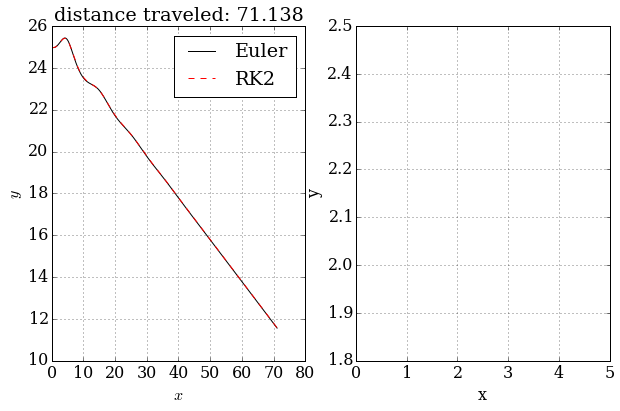

In [48]:
pyplot.figure(figsize=(10,6))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_euler[:idx_ground_euler], y_euler[:idx_ground_euler], 'k-', label='Euler')
pyplot.plot(x_rk2[:idx_ground_rk2], y_rk2[:idx_ground_rk2], 'r--', label='RK2')
pyplot.title('distance traveled: {:.3f}'.format(x_rk2[idx_ground_rk2-1]))
pyplot.legend();

pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x_euler, y_euler, 'k-', label='Euler')
pyplot.plot(x_rk2, y_rk2, 'r--', label='RK2')
pyplot.xlim(0,5)
pyplot.ylim(1.8,2.5);


In [49]:
dt_values = numpy.array([0.1,0.05, 0.01, 0.005, 0.001])
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N=int(T/dt)+1
    t = numpy.linspace(0.0, T, N)
    u = numpy.empty((N,4))
    u[0]= numpy.array([v0, theta0, x0, y0])
    
    for n in range(N-1):
        u[n+1] = rk2_step(u[n],f,dt)
    u_values[i]=u

In [50]:
len (u)

15001

/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


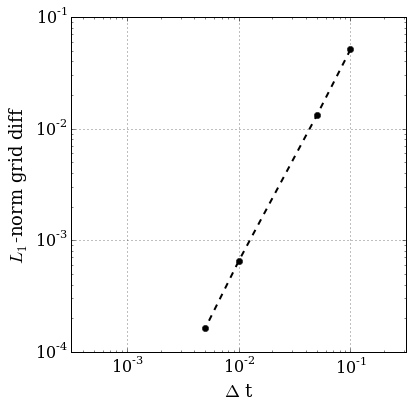

In [51]:
diffgrid = numpy.empty_like(dt_values)
for i, dt in enumerate(dt_values):
    diffgrid[i] = get_diffgrid(u_values[i],u_values[-1],dt)

pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$\Delta$ t', fontsize=18)
pyplot.ylabel(r'$L_1$-norm grid diff', fontsize=18)
pyplot.xlim(1e-4,1)
pyplot.ylim(1e-4,1)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='--', lw=2, marker='o');

In [52]:
r = 2
h = 0.001
dt_values= numpy.array([h,r*h,r**2*h])
u_values= numpy.empty_like(dt_values,dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N= int(T/dt)+1
    t= numpy.linspace(0.0,T,N)
    u=numpy.empty((N,4))
    u[0]=numpy.array([v0,theta0,x0,y0])
    
    for n in range(N-1):
        u[n+1]=rk2_step(u[n],f,dt)
    u_values[i]=u
    
alpha = (log(get_diffgrid(u_values[2],u_values[1],dt_values[2]))\
         -log(get_diffgrid(u_values[1], u_values[0],dt_values[1])))/log(r)
print('order of convergence = {:.3f}'.format(alpha))

order of convergence = 1.983


/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Challenge 1.4

In [53]:
%timeit euler_step
%timeit rk2_step

100000000 loops, best of 3: 18.8 ns per loop
10000000 loops, best of 3: 20.4 ns per loop


In [54]:
?timeit

In [55]:
def leapfrog_step(unm1,u,f,dt):
    return unm1+2.0*dt*f(u)

In [56]:
g= 9.81
v_t = 4.9
C_D = 1/5.0
C_L = 1.0
v0 = 6.5
theta0 = -0.1
x0 = 0.0
y0 = 25.0
T = 36.0
dt= 0.01
N = int(T/dt)+1
u_leapfrog = numpy.empty((N,4))
u_leapfrog[0] = numpy.array([v0,theta0,x0,y0])
u_leapfrog[1] = rk2_step(u_leapfrog[0],f,dt)

for n in range(1,N-1):
    u_leapfrog[n+1] = leapfrog_step(u_leapfrog[n-1], u_leapfrog[n],f,dt)


/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in double_scalars


ValueError: math domain error

In [57]:
x_leapfrog = u_leapfrog[:,2]
y_leapfrog = u_leapfrog[:,3]

idx_neg_leapfrog = numpy.where(y_leapfrog<0.0)[0]
if len(idx_neg_leapfrog)==0:
    idx_ground_leapfrog = N-1
    print('has not touched ground')
else:
    idx_ground_leapfrog = idx_neg_leapfrog[0]

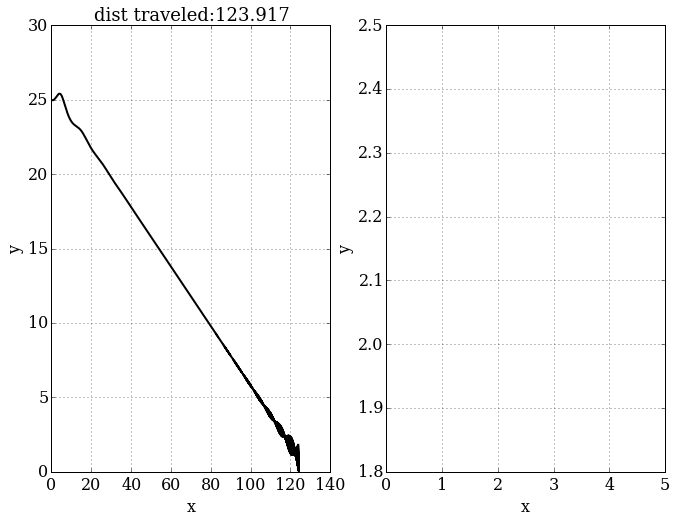

In [58]:
pyplot.figure(figsize=(11,8))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x_leapfrog[:idx_ground_leapfrog], y_leapfrog[:idx_ground_leapfrog], color='k', ls='-', lw=2)
pyplot.title('dist traveled:{:.3f}'.format(x_leapfrog[idx_ground_leapfrog-1]),fontsize=18);

pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x_leapfrog[:idx_ground_leapfrog], y_leapfrog[:idx_ground_leapfrog], color='k', ls= ':', lw=2)
pyplot.plot(x_rk2,y_rk2,'r--',label='RK2')
pyplot.xlim(0,5)
pyplot.ylim(1.8,2.5);

In [60]:
r =2 
h=0.001
dt_values= numpy.array([h,r*h,r**2*h])
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1
    t = numpy.linspace(0.0,T,N)
    u=numpy.empty((N,4))
    u[0]=numpy.array([v0,theta0,x0,y0])
    u[1]=rk2_step(u[0],f,dt)
    for n in range(1,N-1):
        u[n+1]=leapfrog_step(u[n-1],u[n],f,dt)
    u_values[i]=u
    
alpha=(log(get_diffgrid(u_values[2],u_values[1],dt_values[2]))\
       -log(get_diffgrid(u_values[1],u_values[0],dt_values[1])))/log(r)
print('order of convergence = {:.3f}'.format(alpha))

order of convergence = 4.181


/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


i get an error when changing the parameters??